In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os.path


df = pd.read_csv('../original_data/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9
...,...,...,...,...,...
188,Venezuela,333,100,3,7.7
189,Vietnam,111,2,1,2.0
190,Yemen,6,0,0,0.1
191,Zambia,32,19,4,2.5


In [30]:
beer_df = df.sort_values(by='beer_servings', ascending=False)
spirit_df = df.sort_values(by='spirit_servings', ascending=False)
wine_df = df.sort_values(by='wine_servings', ascending=False)
total_df = df.sort_values(by='total_litres_of_pure_alcohol', ascending=False)

In [31]:
top_10_beer = df[['country', 'beer_servings']].nlargest(n=10, columns='beer_servings')
top_10_spirit = df[['country', 'spirit_servings']].nlargest(n=10, columns='spirit_servings')
top_10_wine = df[['country', 'wine_servings']].nlargest(n=10, columns='wine_servings')

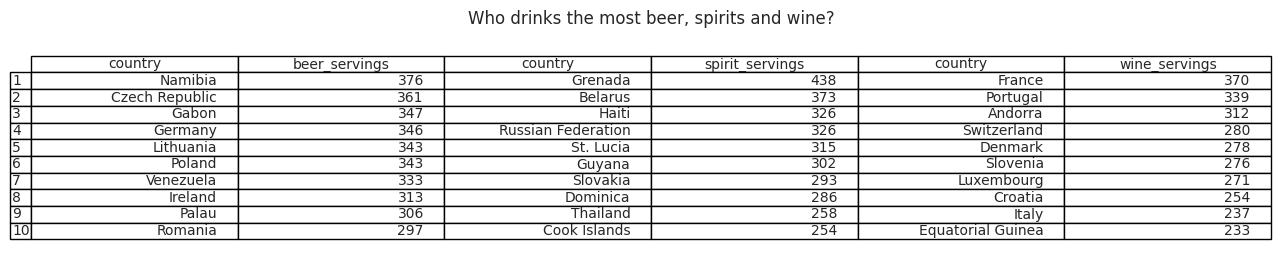

In [32]:
top_10_divided = pd.concat([top_10_beer.reset_index(drop=True), top_10_spirit.reset_index(drop=True), top_10_wine.reset_index(drop=True)], axis=1)

fig = plt.figure(figsize = (16, 3))
ax = fig.add_subplot(111)

ax.table(cellText = top_10_divided.values,
          rowLabels = top_10_divided.index+1,
          colLabels = top_10_divided.columns,
          fontsize=20,
          loc = "center"
         )
ax.set_title("Who drinks the most beer, spirits and wine?")
ax.axis("off")
plt.show()

In [33]:
# save analysis data to specific folder
file_exists = os.path.exists('../analysis_data/top_10_countries_divided_by_types_of_alcohol.csv')
if not file_exists:
    top_10_divided.to_csv('../analysis_data/top_10_countries_divided_by_types_of_alcohol.csv')

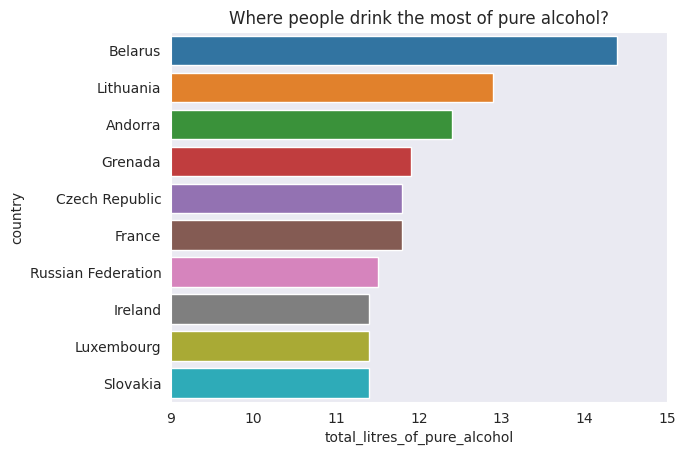

In [34]:
top_10_total = df[['country', 'total_litres_of_pure_alcohol']].nlargest(n=10, columns='total_litres_of_pure_alcohol')

plt.title('Where people drink the most of pure alcohol?')
plt.xlim([9, 15])
plt.grid()
sns.barplot(data=top_10_total, x='total_litres_of_pure_alcohol', y='country', orient='h')
plt.show()

In [35]:
# save analysis data to specific folder
file_exists = os.path.exists('../analysis_data/top_10_countries_pure_alcohol.csv')
if not file_exists:
    top_10_total.to_csv('../analysis_data/top_10_countries_pure_alcohol.csv')

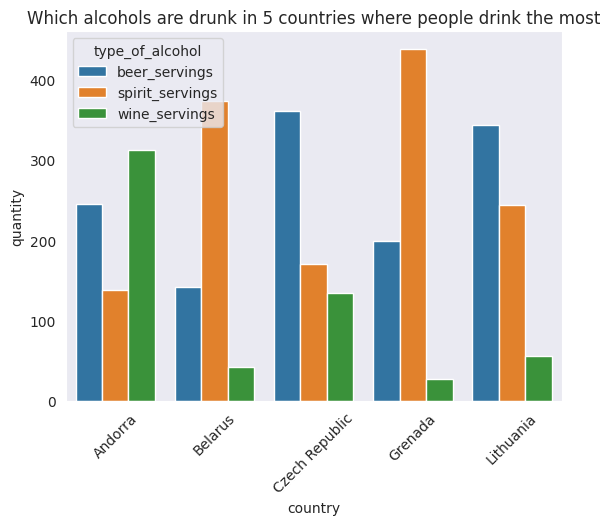

In [36]:
top_5_total = df.nlargest(n=5, columns='total_litres_of_pure_alcohol')
melted_top_5_total = top_5_total[['country', 'beer_servings', 'spirit_servings', 'wine_servings']].melt(['country'], var_name='type_of_alcohol', value_name='quantity').sort_values('country')

plt.xticks(rotation=45)
plt.grid()
plt.title('Which alcohols are drunk in 5 countries where people drink the most')
sns.barplot(data=melted_top_5_total, x='country', y='quantity', hue='type_of_alcohol')
plt.show()

In [37]:
# save analysis data to specific folder
file_exists = os.path.exists('../analysis_data/top_5_countries_all_alcohols.csv')
if not file_exists:
    melted_top_5_total.to_csv('../analysis_data/top_5_countries_all_alcohols.csv')

In [38]:
melted_all = df[['country', 'beer_servings', 'spirit_servings', 'wine_servings']].melt(['country'], var_name='type_of_alcohol', value_name='quantity')
sum_all = pd.pivot_table(melted_all[['type_of_alcohol', 'quantity']], columns='type_of_alcohol', aggfunc=np.sum)
sum_all

type_of_alcohol,beer_servings,spirit_servings,wine_servings
quantity,20489,15632,9544


In [39]:
# save analysis data to specific folder
file_exists = os.path.exists('../analysis_data/sum_of_different_alcohol_servings.csv')
if not file_exists:
    sum_all.to_csv('../analysis_data/sum_of_different_alcohol_servings.csv')

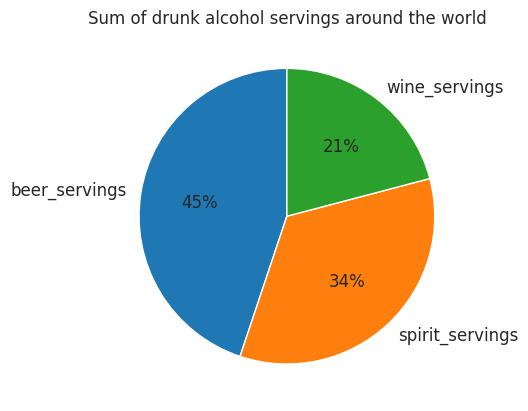

In [40]:
plt.pie(sum_all.values.tolist()[0], labels=sum_all.columns.tolist(),autopct='%.0f%%', textprops={'size': 'larger'}, startangle=90)
plt.title('Sum of drunk alcohol servings around the world')
plt.show()